# Topic Modelling Banjir

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [19]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas yellowbrick gensim pyldavis scipy==1.10.1


  Using cached scipy-1.10.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (53 kB)
Using cached scipy-1.10.1-cp39-cp39-macosx_12_0_arm64.whl (28.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim import models, corpora
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import numpy as np
import os

In [5]:
# Directory for all related files
dataset_dir = '../preprocessing/'
os.makedirs(dataset_dir, exist_ok=True)

In [6]:
os.listdir(dataset_dir)

['Preprocessing_Gempa Bumi.ipynb',
 'Banjir-2018-2023-pre.csv',
 'Kecelakaan-2018-2023-pre.csv',
 'Gempa Bumi-2018-2023-pre.csv',
 'Preprocessing_Kebakaran.ipynb',
 'Preprocessing_Kecelakaan.ipynb',
 'Kebakaran-2018-2023-pre.csv',
 'Preprocessing_Banjir.ipynb']

## Loading Dataset

In [7]:
df = pd.read_csv(os.path.join(dataset_dir, 'Banjir-2018-2023-pre.csv'))
print(df.shape)
df.head()

(6400, 6)


,published date,title,stem,tokens,tokens_clean,merged
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"['banjir', 'genang', '23', 'desa', 'di', 'kabu...","['banjir', 'genang', '23', 'desa', 'kabupaten'...",banjir genang 23 desa kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"['ini', '11', 'titik', 'banjir', 'di', 'denpas...","['11', 'titik', 'banjir', 'denpasar', 'tangan'...",11 titik banjir denpasar tangan balipost com
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"['foto', 'banjir', 'rob', 'terjang', 'semarang']","['foto', 'banjir', 'rob', 'terjang', 'semarang']",foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"['longsor', 'tewas', 'tiga', 'orang', 'jakarta...","['longsor', 'tewas', 'orang', 'jakarta', 'banj...",longsor tewas orang jakarta banjir ungsi langsung
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"['jalur', 'pantura', 'kudus', 'sendat', 'akiba...","['jalur', 'pantura', 'kudus', 'sendat', 'akiba...",jalur pantura kudus sendat akibat banjir


# Topic Modelling

## 1. Clustering (K-Means)

Menggunakan algoritma k-means untuk clustering. Yang di-cluster adalah data pada kolom 'tokens_clean' 

In [8]:
# 1. Konversi string pada kolom 'merged' ke dalam bentuk vektor
#    terlebih dahulu menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['merged'])

In [9]:
# Elbow method
# Source: https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=42, n_init=3).fit(data).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_facecolor("white")
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


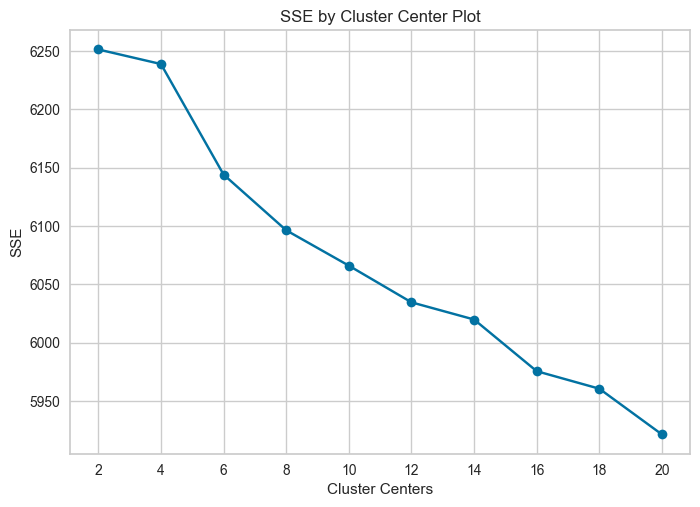

In [10]:
find_optimal_clusters(X, 20)

## 2. LDA

## 3. LSA

## 4. TSNE

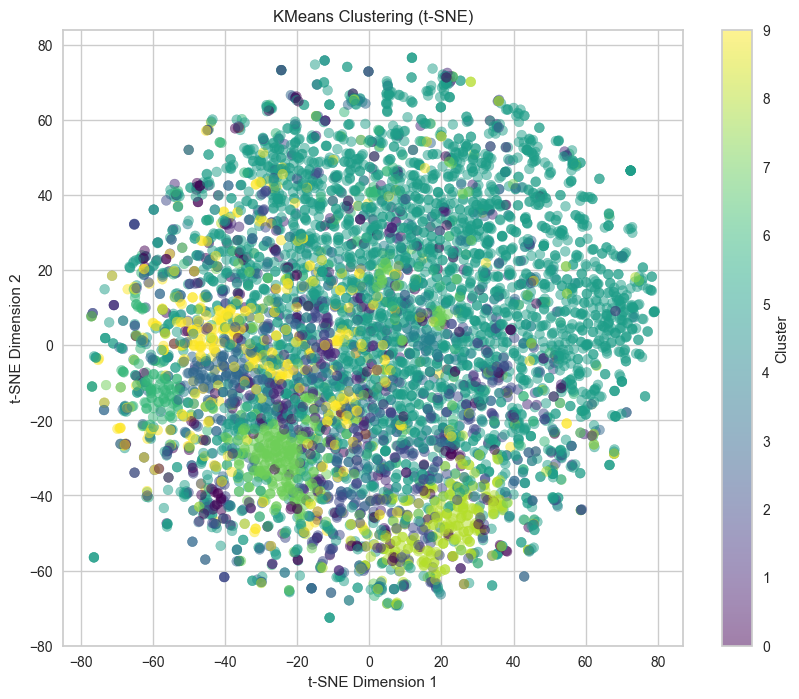

In [39]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
cluster = kmeans.fit_predict(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()